*Coursework*
> Programming in Python for Business Analytics (Group 19)

# 1. Data Preparation

## 1.1 Dataset load and General exploration of data

In [2]:
# Libraries:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

In [4]:
# Import datasets
# Change route for each of us:
tasks = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Python/Coursework/tasks.csv')
suppliers = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Python/Coursework/suppliers.csv')
cost = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Python/Coursework/cost.csv.zip')

### 1. General exploration of data

In [6]:
# Tasks dataset:
tasks.head()

,Task ID,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
0,T1,332,5123,647174452,2111,41.2063244192855%,140069227,22%,1438,0.280695,...,50,0,93828.91,759621.99,12264068,0,382,0.074566,28150864,0.04
1,T2,0,5792,327432022,1619,27.9523480662983%,105875589,32%,1097,0.189399,...,875,0,924983.41,3294170.58,29172807,0,552,0.095304,28894396,0.09
2,T3,469,4346,547810586,1376,31.6612977450529%,90478530,17%,1097,0.252416,...,394,0,258487.96,1781016.69,39064840,0,706,0.162448,19579305,0.04
3,T4,529,7132,700169181,2362,33.1183398766124%,149526281,21%,1474,0.206674,...,997,0,640011.29,2434120.90,29710103,0,371,0.052019,22272333,0.03
4,T5,0,4767,278792402,1215,25.4877281308999%,87557248,31%,1038,0.217747,...,567,0,625549.93,2506860.98,22039095,0,93,0.019509,3058291,0.01


In [10]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 117 entries, Task ID to TF116
dtypes: float64(56), int64(58), object(3)
memory usage: 119.0+ KB


In [12]:
# Suppliers dataset:
suppliers.head()

,Features,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S55,S56,S57,S58,S59,S60,S61,S62,S63,S64
0,SF1,100,100,100,100,10,10,100,100,1000,...,10,10,100,1000,10,10,100,1000,100,100
1,SF2,1000,1000,1000,1000,1000,100,2000,1000,2000,...,2000,100,2000,2000,2000,100,2000,1000,1000,2000
2,SF3,1000,1000,1000,1000,100,2000,1000,100,100,...,1000,2000,2000,2000,100,100,1000,2000,1000,1000
3,SF4,50,50,50,50,500,5,5,50,500,...,50,50,50,5,50,5,5,5,50,500
4,SF5,20,20,20,20,200,200,20,2,20,...,20,20,20,200,20,200,2,200,200,2


In [14]:
# Costs dataset:
cost.head()

,Task ID,Supplier ID,Cost
0,T34,S1,0.478219
1,T34,S2,0.444543
2,T34,S3,0.521679
3,T34,S4,0.307331
4,T34,S5,0.357689


In [16]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7680 entries, 0 to 7679
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Task ID      7680 non-null   object 
 1   Supplier ID  7680 non-null   object 
 2   Cost         7680 non-null   float64
dtypes: float64(1), object(2)
memory usage: 180.1+ KB


In [18]:
cost.groupby('Supplier ID').describe()

Cost                                                    \
             count      mean       std       min       25%       50%   
Supplier ID                                                            
S1           120.0  0.443069  0.056911  0.322824  0.409920  0.445100   
S10          120.0  0.403872  0.058571  0.307112  0.355072  0.409107   
S11          120.0  0.401271  0.052396  0.307484  0.355307  0.405965   
S12          120.0  0.415246  0.055589  0.302905  0.372291  0.421329   
S13          120.0  0.407144  0.055184  0.305388  0.360740  0.414593   
...            ...       ...       ...       ...       ...       ...   
S63          120.0  0.418999  0.054589  0.309390  0.375066  0.420294   
S64          120.0  0.405255  0.052571  0.307449  0.364090  0.406298   
S7           120.0  0.413232  0.054336  0.302261  0.375506  0.419115   
S8           120.0  0.418884  0.051507  0.299798  0.381543  0.414817   
S9           120.0  0.414777  0.050464  0.301240  0.386813  0.414180   

                                 
                  75%       max  
Supplier ID                      
S1           0.473163  0.694525  
S10          0.441094  0.645559  
S11          0.441124  0.621962  
S12          0.451475  0.651132  
S13          0.444870  0.657804  
...               ...       ...  
S63          0.456661  0.689491  
S64          0.441301  0.559792  
S7           0.445572  0.666881  
S8           0.447079  0.657675  
S9           0.439706  0.663978  

[64 rows x 8 columns]

## 1.1. Check missing value


In [21]:
# Missing values
print('Missing values in suppliers dataset:', suppliers.isnull().sum().sum())
print('Missing values in cost dataset:', cost.isnull().sum().sum())
print('Missing values in tasks dataset:', tasks.isnull().sum().sum())

Missing values in suppliers dataset: 0
Missing values in cost dataset: 0
Missing values in tasks dataset: 0


In [23]:
# Tasks (unrelated to cost)
print("No of Task ID in Tasks:",tasks['Task ID'].nunique())
print("No of Task ID in cost:",cost['Task ID'].nunique())

No of Task ID in Tasks: 130
No of Task ID in cost: 120


In [25]:
cost_match = cost['Task ID'].unique()
tasks=tasks.loc[tasks['Task ID'].isin(cost_match)]
tasks['Task ID'].nunique()

120

In [27]:
print("'tasks' dataset info:\n{} tasks\n{} task features".format(len(tasks),len(tasks.columns[1:])))
#suppliers
print("\n'suppliers' dataset info:\n{} suppliers\n{} supplier features".format(len(suppliers),len(suppliers.columns[1:])))
#costs
print("\n'cost' dataset info:\n{} tasks\n{} suppliers\n{} cost values".format(len(cost.loc[:,'Task ID'].unique()), \
    len(cost.loc[:,'Supplier ID'].unique()), len(cost.loc[:, 'Cost'])))

'tasks' dataset info:
120 tasks
116 task features

'suppliers' dataset info:
18 suppliers
64 supplier features

'cost' dataset info:
120 tasks
64 suppliers
7680 cost values


## 1.2. Feature Selection & Scaling

### 1.2.1. Data transformation

In [31]:
# Fixing the structure of the suppliers df
suppliers = suppliers.transpose()
suppliers.columns = suppliers.iloc[0]
suppliers = suppliers.drop('Features', axis='index')
suppliers = suppliers.reset_index()

In [33]:
suppliers.head()

Features,index,SF1,SF2,SF3,SF4,SF5,SF6,SF7,SF8,SF9,SF10,SF11,SF12,SF13,SF14,SF15,SF16,SF17,SF18
0,S1,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,100,96
1,S2,100,1000,1000,50,20,10,0,80,2000,100,1000,5,1000,1000,500,5000,100,96
2,S3,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,0,96
3,S4,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,5000,96
4,S5,10,1000,100,500,200,10,2,80,200,100,2000,8,2000,100,2000,5000,15000,90


In [35]:
# Change tasks object columns to numeric

tasks = tasks.set_index('Task ID')
for col in tasks.columns:
    if tasks[col].dtype == 'object': 
        try:
            tasks[col] = pd.to_numeric(tasks[col].str.rstrip('%'), errors='coerce') /100
        except AttributeError:
            pass
tasks = tasks.reset_index()

In [37]:
tasks.head()

,Task ID,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
0,T1,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,...,50,0,93828.91,759621.99,12264068,0,382,0.074566,28150864,0.04
1,T2,0,5792,327432022,1619,0.279523,105875589,0.32,1097,0.189399,...,875,0,924983.41,3294170.58,29172807,0,552,0.095304,28894396,0.09
2,T3,469,4346,547810586,1376,0.316613,90478530,0.17,1097,0.252416,...,394,0,258487.96,1781016.69,39064840,0,706,0.162448,19579305,0.04
3,T4,529,7132,700169181,2362,0.331183,149526281,0.21,1474,0.206674,...,997,0,640011.29,2434120.90,29710103,0,371,0.052019,22272333,0.03
4,T5,0,4767,278792402,1215,0.254877,87557248,0.31,1038,0.217747,...,567,0,625549.93,2506860.98,22039095,0,93,0.019509,3058291,0.01


### 1.2.2. Feature selection

In [40]:
# Combine datasets for quick analysis (without costs for now)
combined = tasks.merge(suppliers, how='cross')
combined = combined.merge(cost, left_on=['Task ID', 'index'], right_on=['Task ID','Supplier ID'])

# Seperate dataset
combined_features = combined.drop(['Task ID','index','Supplier ID', 'Cost'],  axis='columns')
combined_cost = combined['Cost']

In [42]:
# Each row is a task-specific and supplier-specific combination:
combined_features.head()

,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,TF10,...,SF9,SF10,SF11,SF12,SF13,SF14,SF15,SF16,SF17,SF18
0,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,100,96
1,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,100,96
2,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,0,96
3,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,5000,96
4,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,200,100,2000,8,2000,100,2000,5000,15000,90


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(combined_features, combined_cost)

# Get feature importances
importances = rf.feature_importances_
feature_names = combined_features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [46]:
importance_df.head(10)

,Feature,Importance
70,TF71,0.373425
2,TF3,0.078044
132,SF17,0.062705
23,TF24,0.055078
125,SF10,0.028153
86,TF87,0.025288
94,TF95,0.018380
57,TF58,0.017503
122,SF7,0.014967
85,TF86,0.014732


In [48]:
importance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 70 to 111
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature     134 non-null    object 
 1   Importance  134 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


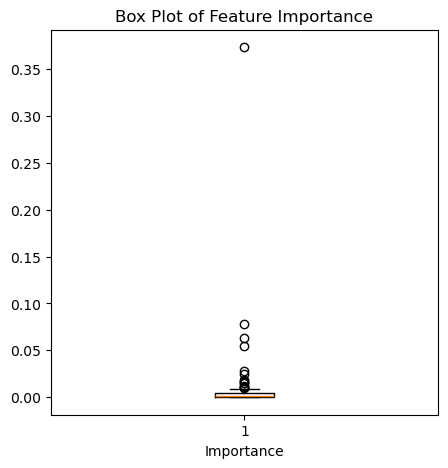

In [50]:
# Visualise the feature importance

plt.figure(figsize = (5,5))
plt.boxplot(importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Box Plot of Feature Importance')
plt.show()

In [52]:
importance_df['Importance'].describe()    

count    134.000000
mean       0.007463
std        0.033492
min        0.000000
25%        0.000758
50%        0.001837
75%        0.004258
max        0.373425
Name: Importance, dtype: float64

In [54]:
# Remove under 25% of Importance
importance_threshold = importance_df['Importance'].quantile(q=0.25)
importance_df = importance_df[importance_df['Importance'] >= importance_threshold]

In [56]:
# Check the feature list
feature_list = importance_df['Feature'].unique()
feature_list

# Feature Seperate
features_T = [feature for feature in feature_list if feature.startswith('T')]
features_S = [feature for feature in feature_list if feature.startswith('S')]

# Check the important features
print('Tasks Features:', features_T)
print('Suppliers Features:', features_S)

Tasks Features: ['TF71', 'TF3', 'TF24', 'TF87', 'TF95', 'TF58', 'TF86', 'TF41', 'TF5', 'TF52', 'TF64', 'TF66', 'TF59', 'TF43', 'TF13', 'TF25', 'TF94', 'TF50', 'TF7', 'TF32', 'TF51', 'TF26', 'TF63', 'TF33', 'TF42', 'TF82', 'TF107', 'TF80', 'TF73', 'TF17', 'TF61', 'TF109', 'TF21', 'TF9', 'TF23', 'TF85', 'TF115', 'TF16', 'TF65', 'TF56', 'TF114', 'TF54', 'TF48', 'TF67', 'TF93', 'TF27', 'TF111', 'TF90', 'TF110', 'TF60', 'TF68', 'TF38', 'TF70', 'TF116', 'TF18', 'TF45', 'TF10', 'TF113', 'TF37', 'TF57', 'TF77', 'TF29', 'TF44', 'TF14', 'TF74', 'TF40', 'TF22', 'TF103', 'TF11', 'TF102', 'TF62', 'TF105', 'TF8', 'TF76', 'TF36', 'TF83', 'TF106', 'TF1', 'TF4', 'TF55', 'TF91', 'TF78']
Suppliers Features: ['SF17', 'SF10', 'SF7', 'SF18', 'SF1', 'SF3', 'SF9', 'SF6', 'SF8', 'SF14', 'SF11', 'SF5', 'SF16', 'SF2', 'SF4', 'SF15', 'SF12', 'SF13']


In [58]:
# Reinstate indicies
tasks = tasks.set_index('Task ID')
suppliers = suppliers.set_index('index')
suppliers.index.rename('Supplier ID', inplace=True)

# Select Tasks Features  (Task features : 116 to 82)
tasks = tasks[features_T]

# Select Suppliers Features  (Suppliers features : 18 to 18)
suppliers = suppliers[features_S]

### 1.2.3. Scaling

In [61]:
tasks.head(1)

,TF71,TF3,TF24,TF87,TF95,TF58,TF86,TF41,TF5,TF52,...,TF8,TF76,TF36,TF83,TF106,TF1,TF4,TF55,TF91,TF78
Task ID,,,,,,,,,,,,,,,,,,,,,
T1,-62,647174452,4525695.47,73331323,49415865,488797828,16463426.25,438112430,0.412063,646,...,1438,7638374.59,468,561,4.06,332,2111,0.24,494,68607119


In [63]:
suppliers.head(1)

Features,SF17,SF10,SF7,SF18,SF1,SF3,SF9,SF6,SF8,SF14,SF11,SF5,SF16,SF2,SF4,SF15,SF12,SF13
Supplier ID,,,,,,,,,,,,,,,,,,
S1,100,100,2,96,100,1000,2000,10,80,1000,1000,20,5000,1000,50,500,5,1000


In [65]:
# Ignore warngings
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

tasks[:] = scaler.fit_transform(tasks)
suppliers[:] = scaler.fit_transform(suppliers)

In [67]:
tasks.head(1)

,TF71,TF3,TF24,TF87,TF95,TF58,TF86,TF41,TF5,TF52,...,TF8,TF76,TF36,TF83,TF106,TF1,TF4,TF55,TF91,TF78
Task ID,,,,,,,,,,,,,,,,,,,,,
T1,0.03876,0.648543,0.84554,-0.282124,-0.50851,0.761884,-0.576706,0.746607,0.074792,-0.596797,...,0.094102,-0.143253,0.729216,-0.519928,-0.975754,-0.05949,0.171649,-0.148936,-0.57157,1.0


In [69]:
suppliers.head(1)

Features,SF17,SF10,SF7,SF18,SF1,SF3,SF9,SF6,SF8,SF14,SF11,SF5,SF16,SF2,SF4,SF15,SF12,SF13
Supplier ID,,,,,,,,,,,,,,,,,,
S1,-0.996,-0.632653,0.333333,0.5,-0.818182,-0.052632,-0.052632,-0.818182,-0.707317,-0.052632,-0.052632,-0.818182,0.2,-0.052632,-0.818182,-0.538462,0.142857,-0.052632


## 1.3. Identifying the top/worst performing suppliers

### 1.3.1. Best performing suppliers of each tasks

In [73]:
#Get ranking of cost(best supplier) by Task ID 

rank_suppliers = cost.set_index(['Task ID','Supplier ID']).sort_values(by=['Task ID','Cost']) 

rank_suppliers['Ranking'] = rank_suppliers.groupby('Task ID')['Cost'].rank().astype(int)
rank_suppliers

Cost  Ranking
Task ID Supplier ID                   
T1      S18          0.355652        1
        S56          0.356349        2
        S47          0.357635        3
        S27          0.367182        4
        S34          0.367398        5
...                       ...      ...
T99     S54          0.489761       60
        S61          0.496773       61
        S20          0.505330       62
        S3           0.525986       63
        S2           0.566809       64

[7680 rows x 2 columns]

In [75]:
# Top 5 suppliers of each tasks
top_suppliers = rank_suppliers[rank_suppliers['Ranking']<=5]
top_suppliers

Cost  Ranking
Task ID Supplier ID                   
T1      S18          0.355652        1
        S56          0.356349        2
        S47          0.357635        3
        S27          0.367182        4
        S34          0.367398        5
...                       ...      ...
T99     S23          0.419289        1
        S14          0.423769        2
        S63          0.427309        3
        S46          0.436918        4
        S51          0.440512        5

[600 rows x 2 columns]

In [77]:
# Visualisation of top-performing suppliers

top_suppliers.reset_index(inplace=True)

supplier_counts = top_suppliers['Supplier ID'].value_counts()
supplier_counts.describe()

count    61.000000
mean      9.836066
std       8.649047
min       1.000000
25%       5.000000
50%       7.000000
75%      12.000000
max      42.000000
Name: count, dtype: float64

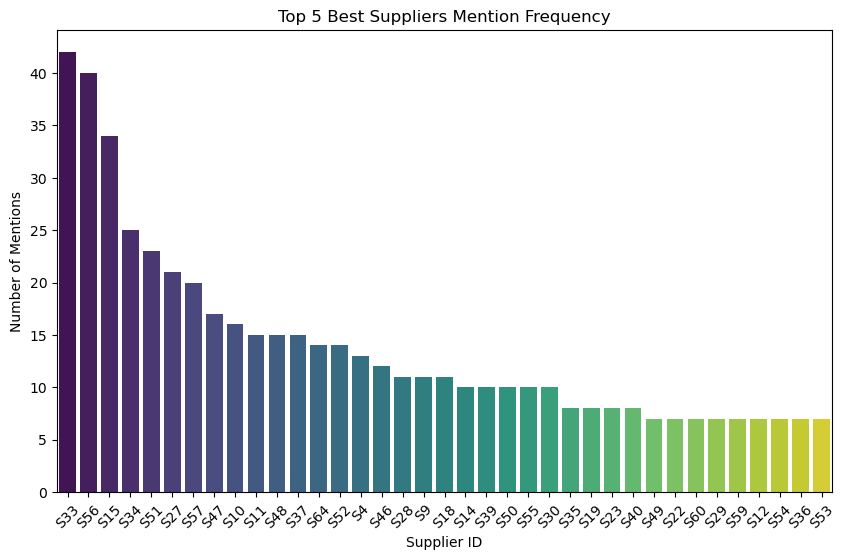

In [79]:
# Visualisation of top-performing suppliers (over 50%)
supplier_counts = supplier_counts[supplier_counts.values >= 7]

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=supplier_counts.index, y=supplier_counts.values, palette='viridis')

plt.title("Top 5 Best Suppliers Mention Frequency")
plt.xlabel("Supplier ID")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45) 

plt.show()


### 1.3.2. Worst performing suppliers

In [81]:
# Worst 5 suppliers of each tasks
worst_suppliers = rank_suppliers[rank_suppliers['Ranking']>=60]

worst_suppliers

Cost  Ranking
Task ID Supplier ID                   
T1      S26          0.499592       60
        S48          0.500558       61
        S44          0.507795       62
        S2           0.512522       63
        S3           0.514350       64
...                       ...      ...
T99     S54          0.489761       60
        S61          0.496773       61
        S20          0.505330       62
        S3           0.525986       63
        S2           0.566809       64

[600 rows x 2 columns]

In [83]:
# Visualisation of top-performing suppliers

worst_suppliers.reset_index(inplace=True)

supplier_counts = worst_suppliers['Supplier ID'].value_counts()
supplier_counts.describe()

count     54.000000
mean      11.111111
std       19.074498
min        1.000000
25%        2.000000
50%        4.000000
75%       12.750000
max      107.000000
Name: count, dtype: float64

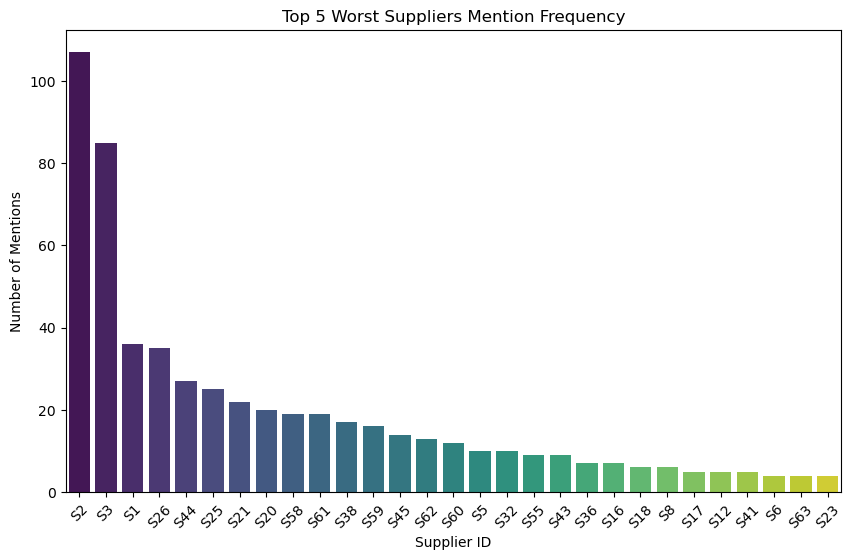

In [85]:
# Visualisation of top-performing suppliers (over 50%)
supplier_counts = supplier_counts[supplier_counts.values >= 4]

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=supplier_counts.index, y=supplier_counts.values, palette='viridis')

plt.title("Top 5 Worst Suppliers Mention Frequency")
plt.xlabel("Supplier ID")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45) 

plt.show()


In [87]:
supplier_counts.head()

Supplier ID
S2     107
S3      85
S1      36
S26     35
S44     27
Name: count, dtype: int64

In [89]:
# Drop 5 worst suppliers
suppliers.reset_index(inplace=True)

# List of worst suppliers
worst_suppliers = ['S2', 'S3', 'S1', 'S26', 'S44']
suppliers = suppliers[~suppliers['Supplier ID'].isin(worst_suppliers)]

suppliers.set_index('Supplier ID', inplace=True)

print(f"Remove worst 5 suppliers, now we have {suppliers.shape[0]} Suppliers.")

Remove worst 5 suppliers, now we have 59 Suppliers.


In [91]:
# Alter cost tables based on coordinated suppliers
suppliers_list= suppliers.index

cost = cost[cost['Supplier ID'].isin(suppliers_list)]

print("Cost rows after removing worst 5 suppliers:", len(cost))

Cost rows after removing worst 5 suppliers: 7080


In [811]:
# Save final dataset
df = pd.DataFrame(cost)
df.to_csv('cost.csv', index=False)

df = pd.DataFrame(suppliers)
df.to_csv('suppliers.csv', index=False)

df = pd.DataFrame(tasks)
df.to_csv('tasks.csv', index=False)

## 1.4. Correlation Matrix between predictors

In [93]:
# Whole dataset:
tasks = tasks.reset_index()
suppliers = suppliers.reset_index()

merged = tasks.merge(suppliers, how='cross')
dataset = merged.merge(cost,
                       left_on=['Task ID','Supplier ID'],
                       right_on=['Task ID','Supplier ID'])

In [95]:
dataset.head()

,Task ID,TF71,TF3,TF24,TF87,TF95,TF58,TF86,TF41,TF5,...,SF14,SF11,SF5,SF16,SF2,SF4,SF15,SF12,SF13,Cost
0,T1,0.03876,0.648543,0.84554,-0.282124,-0.50851,0.761884,-0.576706,0.746607,0.074792,...,-0.052632,-0.052632,-0.818182,0.2,-0.052632,-0.818182,-0.538462,0.142857,-0.052632,0.384386
1,T1,0.03876,0.648543,0.84554,-0.282124,-0.50851,0.761884,-0.576706,0.746607,0.074792,...,-1.0,1.0,1.0,0.2,-0.052632,1.0,1.0,1.0,1.0,0.427075
2,T1,0.03876,0.648543,0.84554,-0.282124,-0.50851,0.761884,-0.576706,0.746607,0.074792,...,1.0,1.0,1.0,0.2,-1.0,-1.0,-0.538462,-1.0,-1.0,0.386642
3,T1,0.03876,0.648543,0.84554,-0.282124,-0.50851,0.761884,-0.576706,0.746607,0.074792,...,-1.0,-0.052632,-0.818182,1.0,1.0,-1.0,1.0,0.142857,1.0,0.392691
4,T1,0.03876,0.648543,0.84554,-0.282124,-0.50851,0.761884,-0.576706,0.746607,0.074792,...,1.0,-1.0,-1.0,1.0,-0.052632,-0.818182,-0.538462,0.142857,1.0,0.434512


In [97]:
X = dataset.drop(['Task ID','Supplier ID','Cost'], axis='columns')

In [99]:
# All predictors as numeric vectors:
X_numeric = X.apply(pd.to_numeric, errors='coerce')

In [101]:
# Task features (columns starting with 'TF')
task_features = X_numeric.filter(like='TF')

# Supplier features (columns starting with 'SF')
supplier_features = X_numeric.filter(like='SF')

In [103]:
correlation_matrix_tf = task_features.corr()
correlation_matrix_sf = supplier_features.corr()

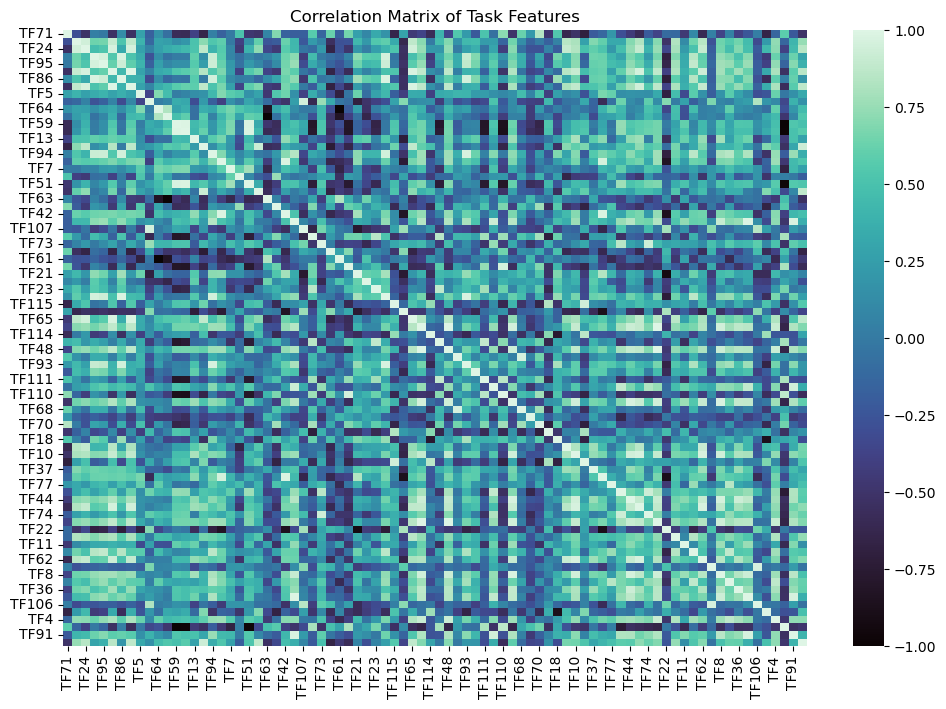

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_tf, cmap='mako', annot=False, fmt=".2f")
plt.title("Correlation Matrix of Task Features")
plt.show()

In [111]:
# We can change this:
upper_threshold = 0.8
lower_threshold = -0.8

# Compute the correlation matrix
corr_matrix = correlation_matrix_tf

# Extract the pairs that exceed thresholds
high_corr_pairs = [
    (feature1, feature2, corr_matrix.loc[feature1, feature2])
    for feature1 in corr_matrix.columns
    for feature2 in corr_matrix.columns
    if feature1 != feature2 and (corr_matrix.loc[feature1, feature2] > upper_threshold or corr_matrix.loc[feature1, feature2] < lower_threshold)
]

# Create a DataFrame of high correlation pairs
high_corr_table = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Drop duplicate pairs (since correlation matrix is symmetric)
high_corr_table = high_corr_table.drop_duplicates(subset=['Correlation']).sort_values(by='Correlation', ascending=False)


In [113]:
# These are the high correlated predictors that we should drop:
high_corr_table.head()

,Feature 1,Feature 2,Correlation
187,TF56,TF40,0.999353
208,TF48,TF40,0.998891
182,TF56,TF48,0.998122
34,TF58,TF41,0.996090
132,TF82,TF83,0.990991


In [115]:
# Get all unique features involved in highly correlated pairs
high_corr_features = set(
    feature
    for feature1, feature2, _ in high_corr_pairs
    for feature in (feature1, feature2)
)

In [117]:
features_to_drop = set()
# Iterate through high correlation pairs
for feature1, feature2, *_ in high_corr_pairs:
    # If neither feature has been marked for removal, mark one for elimination
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        # Decide to keep feature1 and drop feature2 (arbitrary decision)
        features_to_drop.add(feature2)

# Drop the redundant features from the dataset
final_features = [col for col in corr_matrix.columns if col not in features_to_drop]
featuresNEW = task_features[final_features]

print(f"Number of features eliminated: {len(features_to_drop)}")
print(f"Number of features retained: {len(final_features)}")

Number of features eliminated: 51
Number of features retained: 31


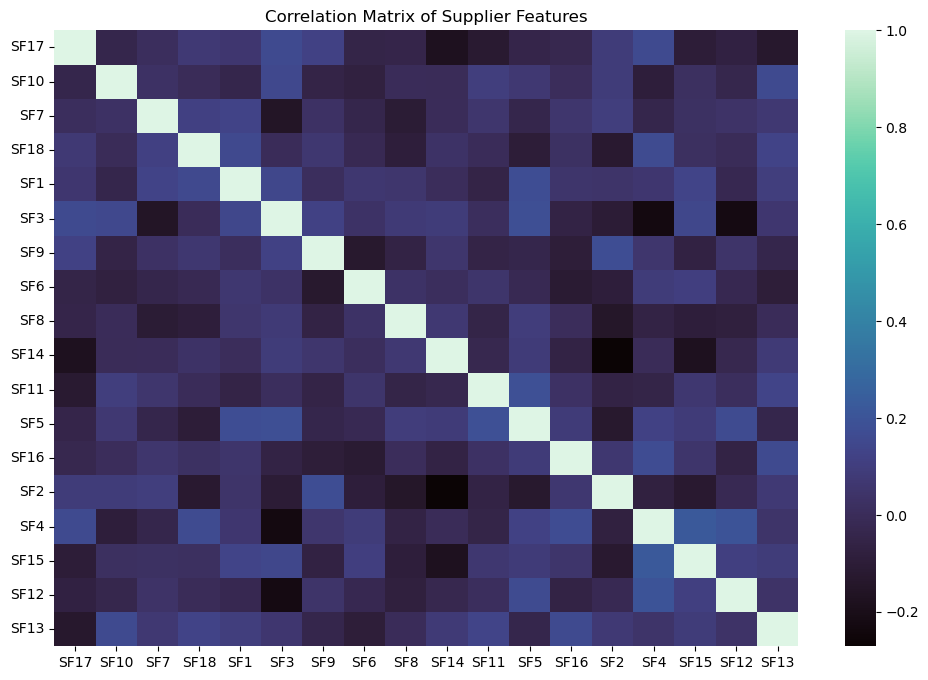

In [119]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_sf, cmap='mako', annot=False, fmt=".2f")
plt.title("Correlation Matrix of Supplier Features")
plt.show()

In [121]:
# Compute the correlation matrix
corr_matrix = correlation_matrix_sf

# Extract the pairs that exceed thresholds
high_corr_pairs = [
    (feature1, feature2, corr_matrix.loc[feature1, feature2])
    for feature1 in corr_matrix.columns
    for feature2 in corr_matrix.columns
    if feature1 != feature2 and (corr_matrix.loc[feature1, feature2] > upper_threshold or corr_matrix.loc[feature1, feature2] < lower_threshold)
]

# Create a DataFrame of high correlation pairs
high_corr_table = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Drop duplicate pairs (since correlation matrix is symmetric)
high_corr_table = high_corr_table.drop_duplicates(subset=['Correlation']).sort_values(by='Correlation', ascending=False)

In [123]:
# No high correlated predictos for Suppliers Features
high_corr_table.head()

,Feature 1,Feature 2,Correlation


In [125]:
# Step 1: Get the list of task features to retain
selected_task_features = set(featuresNEW.columns)  # Columns in the NEWtask_features dataset

# Step 2: Identify task features in the full dataset
all_columns = dataset.columns  # Columns in the full dataset
task_features_in_full = [col for col in all_columns if col.startswith('TF')]  

# Step 3: Identify task features to drop
task_features_to_drop = [col for col in task_features_in_full if col not in selected_task_features]

# Step 4: Drop unnecessary task features while retaining all other variables
FINALdataset = dataset.drop(columns=task_features_to_drop)

print(f"Number of dropped task features: {len(task_features_to_drop)}")
print(f"Number of remaining columns: {FINALdataset.shape[1]}")


Number of dropped task features: 51
Number of remaining columns: 52


In [127]:
FINALdataset.head()

,Task ID,TF71,TF3,TF87,TF5,TF52,TF64,TF59,TF13,TF25,...,SF14,SF11,SF5,SF16,SF2,SF4,SF15,SF12,SF13,Cost
0,T1,0.03876,0.648543,-0.282124,0.074792,-0.596797,0.185185,0.148936,0.735664,0.718965,...,-0.052632,-0.052632,-0.818182,0.2,-0.052632,-0.818182,-0.538462,0.142857,-0.052632,0.384386
1,T1,0.03876,0.648543,-0.282124,0.074792,-0.596797,0.185185,0.148936,0.735664,0.718965,...,-1.0,1.0,1.0,0.2,-0.052632,1.0,1.0,1.0,1.0,0.427075
2,T1,0.03876,0.648543,-0.282124,0.074792,-0.596797,0.185185,0.148936,0.735664,0.718965,...,1.0,1.0,1.0,0.2,-1.0,-1.0,-0.538462,-1.0,-1.0,0.386642
3,T1,0.03876,0.648543,-0.282124,0.074792,-0.596797,0.185185,0.148936,0.735664,0.718965,...,-1.0,-0.052632,-0.818182,1.0,1.0,-1.0,1.0,0.142857,1.0,0.392691
4,T1,0.03876,0.648543,-0.282124,0.074792,-0.596797,0.185185,0.148936,0.735664,0.718965,...,1.0,-1.0,-1.0,1.0,-0.052632,-0.818182,-0.538462,0.142857,1.0,0.434512


In [129]:
list = FINALdataset.columns

TF_columns = [col for col in list if col.startswith('TF')]
SF_columns = [col for col in list if col.startswith('SF')]

print(len(TF_columns))
print(len(SF_columns))

31
18


In [131]:
# Save final dataset
df = pd.DataFrame(FINALdataset)
df.to_csv('final_data.csv')

In [807]:
df = pd.DataFrame(dataset)
df.to_csv('final_data_womulticol.csv')